In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# CogSci 131 - Assignment 5

Selena Zhang

## Question 1

The first way I could convert these to distances would be to subtract the similarity from 1 and do that for every cell in the row. The second way to convert these into distances would be to take the inverse of the similarity, i.e. 1/similarity, to find the distance. The third way to convert would be to take the logarithm of 1-similarity. 

There is an inverse relationship between similarity and the distance: the more similar something is (closer to 1), the less distance there is between then. All of these methods preserve this negative relationship, but taking the inverse and having an arbitrary reference point may not be the most accurate nor optimal way to do so. The inverse may create some hyperbolic and polynomial curves that won't be best for regression fitting, and the logarithm may lead to distorted graphs and scaling issues.

For this assignment, I will use "1 minus similarity" definition, which is the most efficient and consistent way to find the distances because they all retain the same scale. Furthermore, a linear transformation like this will prevent any strange polynomial errors or approximations.

In [13]:
#converting similarities to distances

similarities = np.loadtxt(open("Assignment5-similarities.csv", "rb"), delimiter=",", skiprows=1)

testdistances = [1-x for x in similarities] 
distances = [1-x for x in similarities] 
testdistances

[array([0.        , 0.81481481, 0.51851852, 0.85185185, 0.25925926,
        0.92592593, 0.22222222, 0.22222222, 0.11111111, 0.88888889,
        0.85185185, 0.59259259, 0.14814815, 0.07407407, 0.2962963 ,
        0.96296296, 1.        , 0.25925926, 0.92592593, 0.51851852,
        0.96296296]),
 array([0.81481481, 0.        , 0.66666667, 0.81481481, 0.03703704,
        1.        , 0.        , 0.07407407, 0.40740741, 0.37037037,
        1.        , 0.59259259, 0.77777778, 0.62962963, 0.18518519,
        1.        , 0.2962963 , 0.22222222, 0.88888889, 0.92592593,
        1.        ]),
 array([0.51851852, 0.66666667, 0.        , 0.40740741, 0.11111111,
        0.85185185, 0.22222222, 0.25925926, 0.37037037, 0.81481481,
        0.88888889, 0.92592593, 0.33333333, 0.11111111, 0.59259259,
        0.96296296, 0.85185185, 0.85185185, 0.96296296, 0.77777778,
        0.81481481]),
 array([0.85185185, 0.81481481, 0.40740741, 0.        , 0.11111111,
        0.88888889, 0.18518519, 0.48148148, 0.5555

## Question 2

In [14]:
#euclidean distance function
def euclid_distance(x, y):
    # x = [i, j], y=[u, v]
    return ((x[1]-x[0])**2 + (y[1] - y[0])**2)**0.5

#computing stress
#equation: sum of (psi - dist(pi, pj))^2
def stress(positions):
    summation = []
    #iterating over each row and column
    for i in np.arange(len(positions)):
        #j is 2d
        for j in np.arange(1):
            #ignoring diagonals
            if i != j:
                summation.append((distances[i][j] - euclid_distance(positions[i], positions[j]))**2)
            else:
                pass 
    return np.cumsum(summation)[-1]

#values: 2 dimensions, 21 sports
testpoints = np.random.uniform(0,1,size=(21,2))
#test
stress(testpoints)

2.813157081812429

## Question 3

In [15]:
##'helper' functions to make the final computation easier
#function to add deltas
def delta_helper(positions, i, j, delt):
    #turn matrix into an array
    array = np.array(positions)
    #add the change in delta
    array[i, j] = array[i,j] + delt
    return array

#gradient for one individual point at position i and j
def gradient(positions, i, j, delta):
    plus_delta = stress(delta_helper(positions, i, j, delta))
    #multiplying delta by -1 will subtract delta off
    minus_delta = stress(delta_helper(positions, i, j, -1*delta))
    gradient_result = (plus_delta - minus_delta)/(2*delta)
    return gradient_result
#test
gradient(testpoints, 5, 0, 0.01)

0.02488808451643898

In [16]:
#gradient of all of the points
def gradient_all(positions):
    #blank array
    gradient_array = np.empty([21,2])
    for i in np.arange(len(positions)):
        # replace empty array dimension poisition with the **calculated gradient**. iterating over rows
        #gradient in x
        grad_x = gradient(positions, i, 0, 0.01)
        #gradient in y
        grad_y = gradient(positions, i, 1, 0.01)
        gradient_array[i] = [grad_x, grad_y]
    return gradient_array
#test
gradient_all(testpoints)

array([[ 2.81205456, -2.81205456],
       [-0.11851094,  0.11851094],
       [-0.08607281,  0.08607281],
       [ 0.45744646, -0.45744646],
       [ 0.01347761, -0.01347761],
       [ 0.02488808, -0.02488808],
       [-0.65381248,  0.65381248],
       [ 0.52468218, -0.52468218],
       [ 0.46387511, -0.46387511],
       [-0.50312891,  0.50312891],
       [ 0.44078332, -0.44078332],
       [ 0.15886737, -0.15886737],
       [-1.02129437,  1.02129437],
       [-0.03524393,  0.03524393],
       [ 0.70785458, -0.70785458],
       [-0.03593102,  0.03593102],
       [-0.08902916,  0.08902916],
       [ 0.01515623, -0.01515623],
       [ 0.17492891, -0.17492891],
       [-0.07495241,  0.07495241],
       [ 0.60552865, -0.60552865]])

## Question 4

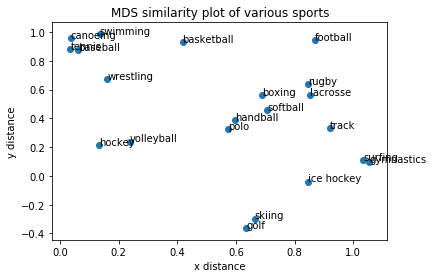

In [18]:
#mds function 
def min_mds():
    #generate actual points and distance matrices inside function
    points = np.random.uniform(0,1,size=(21,2))
    distances = [1-x for x in similarities] 
    #labels for sports
    sport = ["football", "baseball", "basketball", "tennis", "softball", "canoeing", 
         "handball", "rugby", "hockey", "ice hockey", "swimming", "track", "boxing", 
         "volleyball", "lacrosse", "skiing", "golf", "polo", "surfing", "wrestling", "gymnastics"]
    #following gradient downhill to minimize stress as per lecture
    #scaling it down
    for i in np.arange(100):
        for point in points: 
            points -= gradient_all(points)*0.01
    #appending values
    x_vals=[]
    y_vals=[]
    for position in points:
        x_vals.append(position[0])
        y_vals.append(position[1]) 
    #plot format
    plt.figure()
    plt.title('MDS similarity plot of various sports')
    plt.xlabel('x distance')
    plt.ylabel('y distance')
    plt.scatter(x_vals, y_vals)
    #adding labels 
    for i, sport in enumerate(sport):
        plt.annotate(sport, (x_vals[i], y_vals[i]))

min_mds()

These results somewhat are in alignment with my intution: sports that are more similar to each other tend to be near the same area, while radically different sports are on opposite ends of the graph. While I may not personally agree that some of these sports are more similar than others and where they are placed in relation to each other, it gives a very rough estimate of where things are placed in the MDS space.

## Question 5

In [ ]:
#pairwise distances of mds--same thing as q4 but finding the distances

def dist(x, y):
    return (y**2 - x**2)**0.5

def mds_q5():
    #generate actual points and distance matrices inside function
    points = np.random.uniform(0,1,size=(21,2))
    distances = [1-x for x in similarities] 
    #labels for sports
    sport = ["football", "baseball", "basketball", "tennis", "softball", "canoeing", 
         "handball", "rugby", "hockey", "ice hockey", "swimming", "track", "boxing", 
         "volleyball", "lacrosse", "skiing", "golf", "polo", "surfing", "wrestling", "gymnastics"]
    #following gradient downhill to minimize stress as per lecture
    #scaling it down
    for i in np.arange(100):
        for point in points: 
            points -= gradient_all(points)*0.01
##calculating pairwise distance
    x_vals=[]
    y_vals=[]
    for position in points:
        x_vals.append(position[0])
        y_vals.append(position[1])
    pairwise_dist = []
    for i in np.arange(len(x_vals)):
        pairwise_dist.append(dist(x_vals[i], y_vals[i]))
    print(pairwise_dist)
    psych_dist = []
    for i in np.arange(len(points)):
        for j in np.arange(1):
            #ignoring diagonals
            if i != j:
                psych_dist.append((distances[i][j]))
#     #plot format
    plt.figure()
    plt.title('Pairwise distances vs psychological distances')
    plt.xlabel('psychlogical distances')
    plt.ylabel('pairwise distances')
    plt.scatter(psych_dist, pairwise_dist)
    #adding labels 
    for i, sport in enumerate(sport):
        plt.annotate(sport, (psych_dist[i], pairwise_dist[i]))
    #iterating over each row and column


Good plots will show that the difference between the psychological error and the MDS will have a one to one linear relationship.


## Question 6

[21.493172058270517, 11.323302725254536, 0.44725609331477933, 0.008356861283938288, 0.00011574382872268488, 2.202869698137527e-06, 3.3712649032372206e-08, 7.982383494005966e-10, 1.4367044351008043e-11, 1.7349680544145147e-13, 2.7298272527611056e-15, 2.6035901405332846e-17]


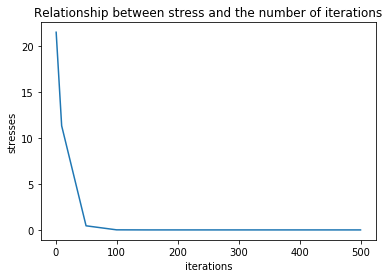

<Figure size 432x288 with 0 Axes>

In [19]:
def stress_vs_iterations():
    #blank stress, preset number of iterations
    iterations = [1, 10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    stresses = []
    for i in np.arange(len(iterations)):
        #setting points and steps again, similar to question 4
        points = np.random.normal(0 ,1 ,size=(21,2))
        for steps in np.arange(iterations[i]):
            points -= gradient_all(points)*0.01
        stresses.append(stress(points))
    print(stresses)
    plt.plot(iterations, stresses)
    plt.xlabel('iterations')
    plt.ylabel('stresses')
    plt.title('Relationship between stress and the number of iterations')
    plt.figure()
stress_vs_iterations()

This graph shows what the stress is at various number of iterations. We find the minimum stress on this graph and match it to the number of iterations. We see that between 50 and 100 iterations, the stress drops dramatically from 40+ to 1. This means that the minimum number of iterations we need to perform is around 50 if we would like to minimize stresses while still running an efficient code

## Question 7

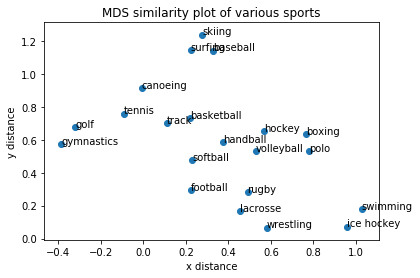

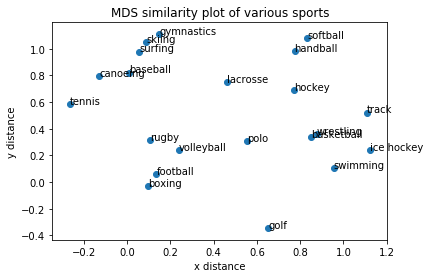

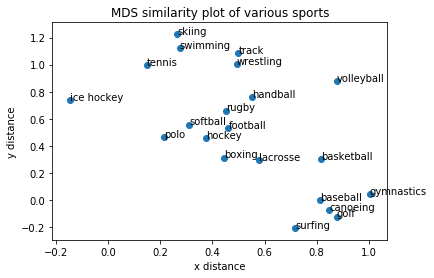

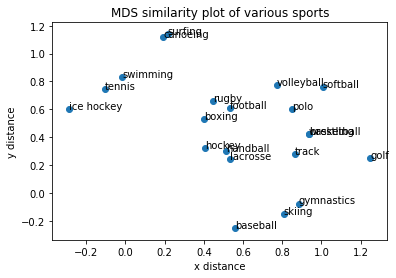

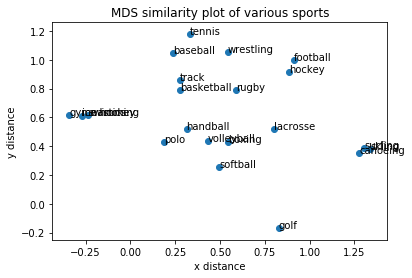

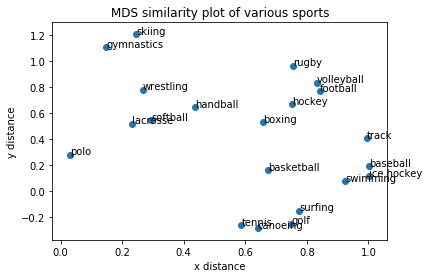

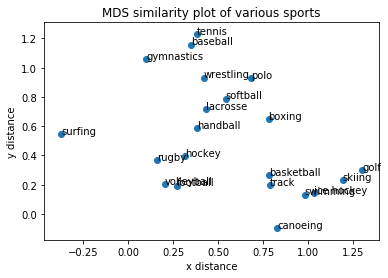

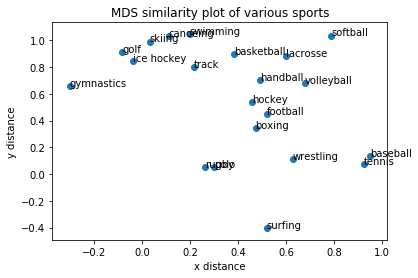

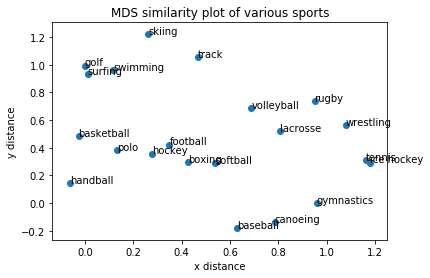

In [22]:
for i in range(9):
    min_mds()

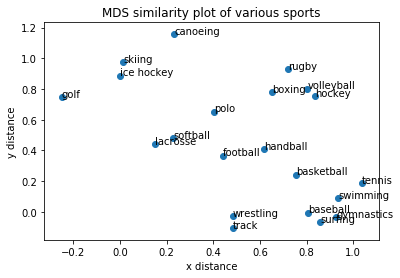

In [24]:
##10th graph
min_mds()

None of these graphs are the same because the points variable is random and is set within each function, meaning that it will be called when the function is executed, and it will present a random set of starting points each time. As a result, none of these graphs are the same, because the function to minimize stress relies on these random points in the equation. 

## Question 8

If I were to choose the best one to use, I would first run different versions of the function and code them wtih more iterations and a smaller step size to know that I was following the gradient more closely. I could also juse the min() function to find the one that minimizes all stress within the MDS.